# Bivariate Visualization

Bivarite Visualization are those visualizations involving two variables. The variation in one variable will affect the value of the other variable.

In this notebook we will explore following types of visualizations:

- scatterplots
- heat maps
- violin plots
- box plots
- clustered bar charts
- faceting
- line plots

In [1]:
# importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline 
#to display the plot in the notebook


In [4]:
# Read the CSV file and viewing it's summary
fuel_econ = pd.read_csv('fuel-econ.csv')
print(fuel_econ.info())

Summary of the basic information about this DataFrame and its data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-

In [12]:
fuel_econ.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


### Correlation coefficient

The correlation coefficient is a statistical measure of the strength of a linear relationship between two variables. Its values can range from -1 to 1. A correlation coefficient of -1 describes a perfect negative, or inverse, correlation, with values in one series rising as those in the other decline, and vice versa.

The most common, called a Pearson correlation coefficient, measures the strength and the direction of a linear relationship between two variables.

In [13]:
corr_matrix = fuel_econ.corr(numeric_only = True)['comb']
corr_matrix

id           0.093803
year         0.071993
cylinders   -0.738023
displ       -0.758397
pv2         -0.290883
pv4          0.047333
city         0.989552
UCity        0.981106
highway      0.962757
UHighway     0.956580
comb         1.000000
co2         -0.929399
feScore      0.928862
ghgScore     0.918807
Name: comb, dtype: float64

# Scatter Plot

If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second.

One basic way of creating a scatterplot is through Matplotlib's `scatter` function:

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

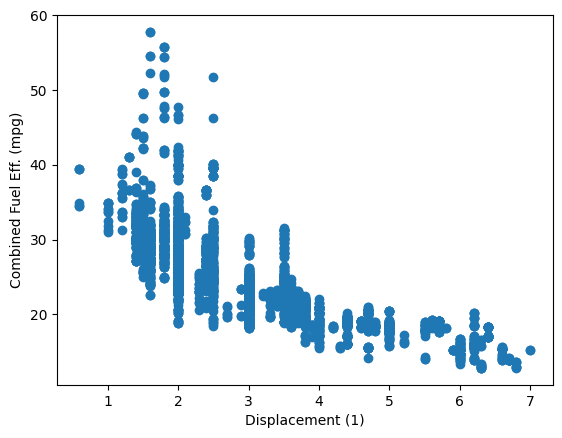

In [14]:
# Scatter plot
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Seaborn's `regplot()` function combines scatterplot creation with regression function fitting:

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

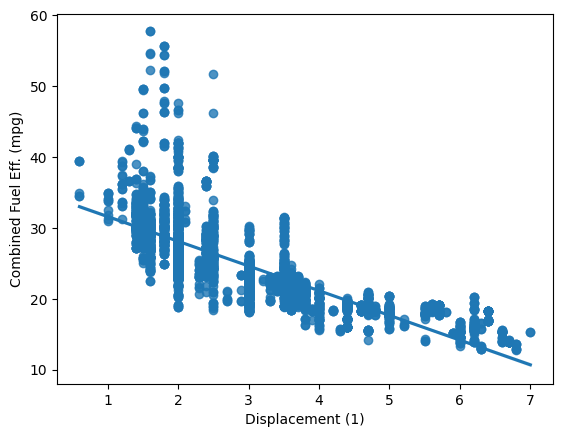

In [15]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

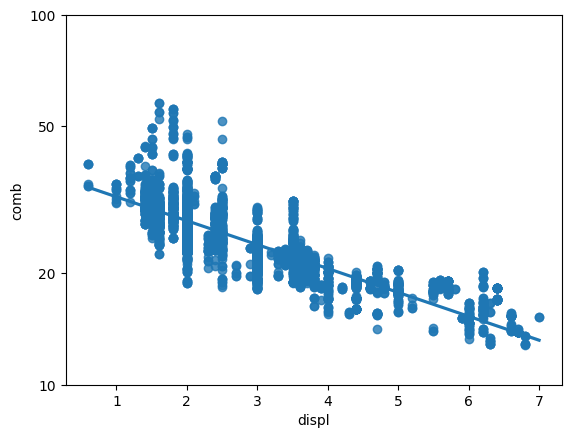

In [16]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(data= fuel_econ, x=fuel_econ['displ'], y=fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

## Overplotting, Transparency, and Jitter

If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

Something like this: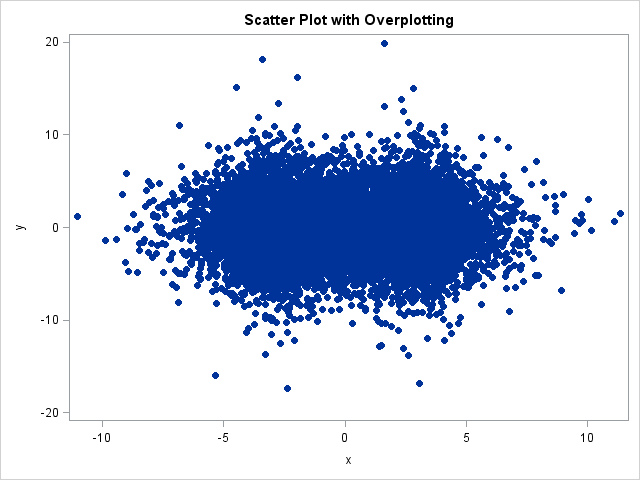

and if the values are discrete, then like this: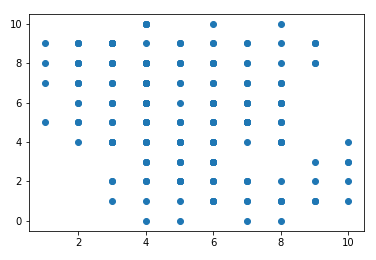

Let's see an example below for each Jitter to move the position of each point slightly from its true value. Jitter is not a direct option in matplotlib's scatter() function, but is a built-in option with seaborn's regplot() function. The x- and y- jitter can be added independently, and won't affect the fit of any regression function, if made.

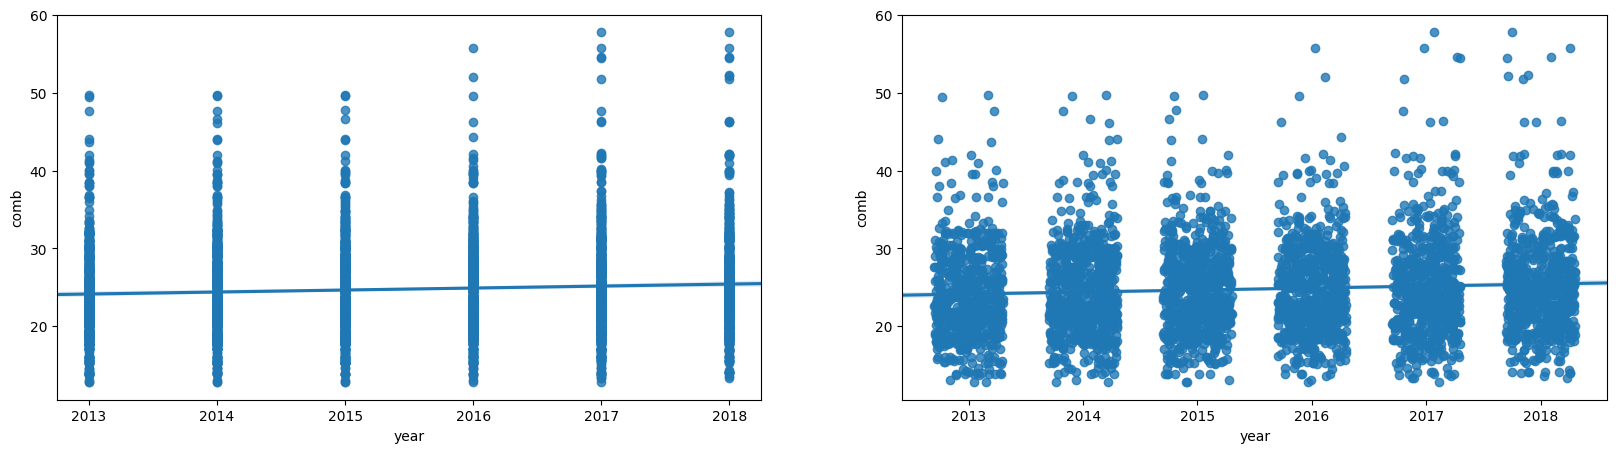

In [20]:
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)

#taking the co relation between year of production and the fuel average of vehicles:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False);

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3

sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3);

You can add transparency to either `scatter()` or `regplot()` by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque). 

Text(0.5, 1.0, 'Matplotlib Scatter')

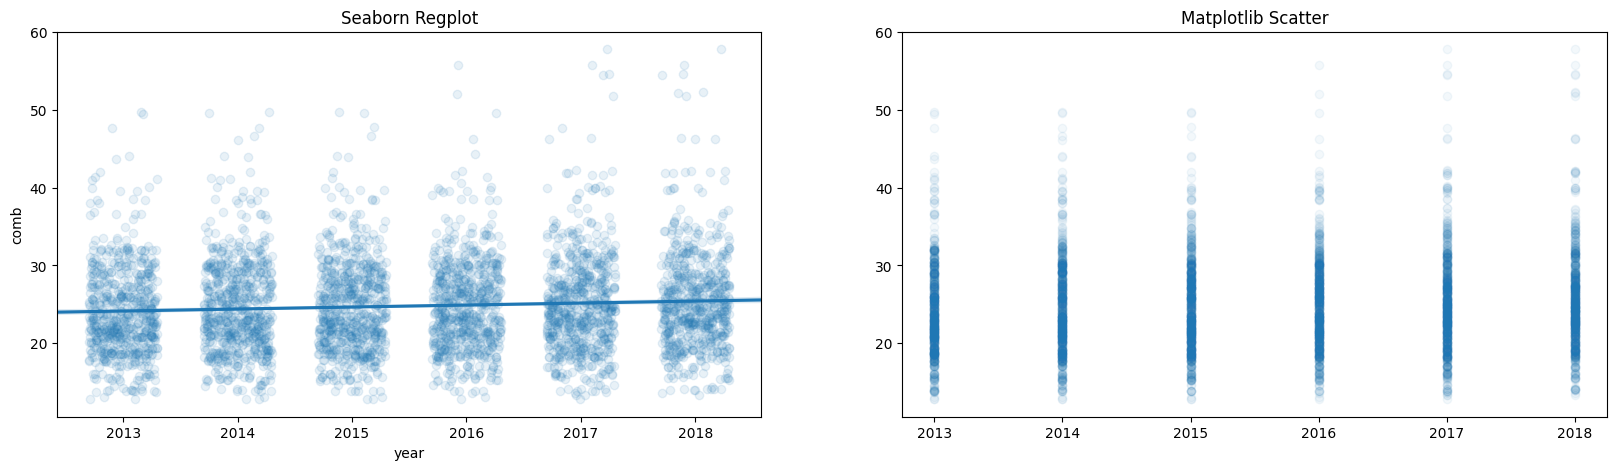

In [23]:
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':2/20});
plt.title("Seaborn Regplot")

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.subplot(1, 2, 2)
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/20);
plt.title("Matplotlib Scatter")

# Heat Maps

In the above Scatter Plots when we applied jittering and transperency we can see the relationship between the color and density of data. Heat Map is a Bivarite plot type which uses this relationship.

A **heat map** is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color

**Heat maps are useful in the following cases:**
1. To represent a plot for discrete vs. another discrete variable
2. As an alternative to transparency when the data points are enormous

Heat map can be implemented with Matplotlib's `hist2d()` function.

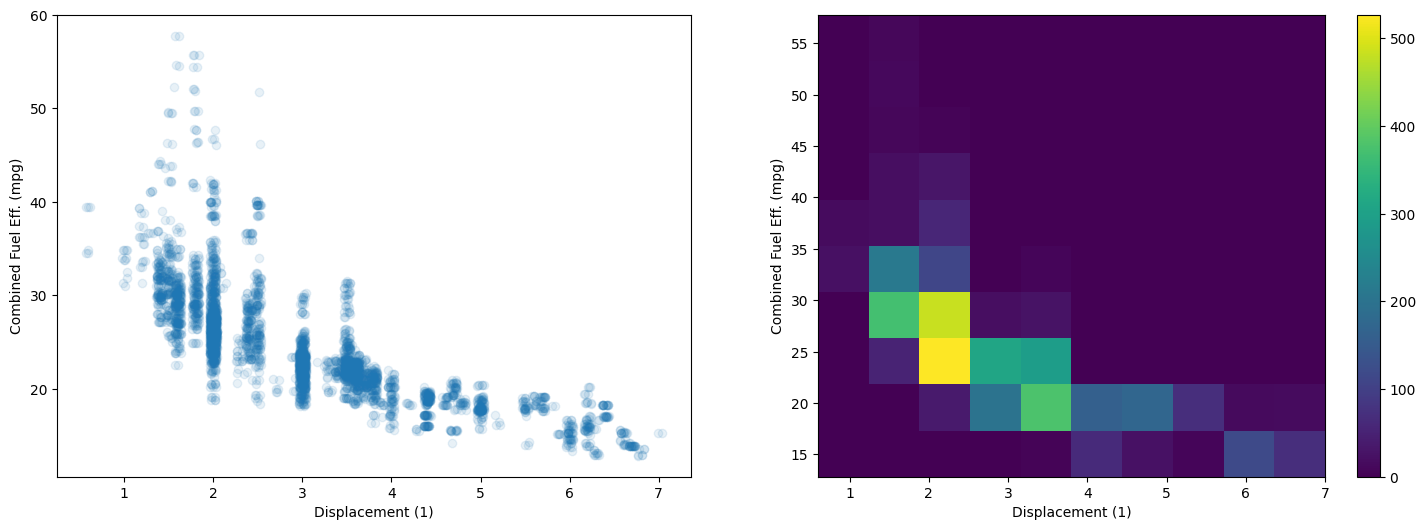

In [36]:
plt.figure(figsize = [18, 6])

# Scatter plot showing relation between Displacement and Fuel Avaerage
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# same thing with the heatMap
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### cmap and cmin parameters

- To select a different color palette, you can set the **cmap** parameter in hist2d
- The **cmin** parameter specifies the minimum value in a cell before it will be plotted.


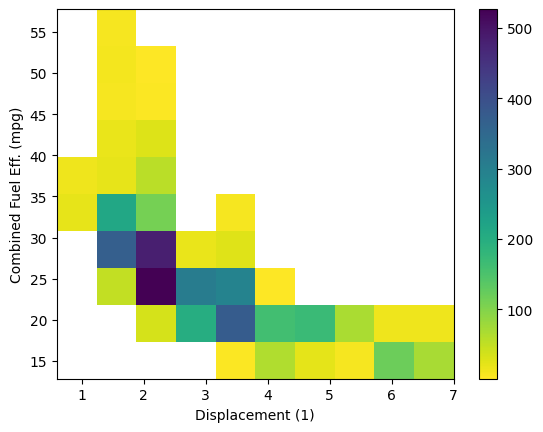

In [37]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Heat plot - Specify bin edges

We can look into the descriptive statistics of the two columns to define the bin edges.

In [41]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


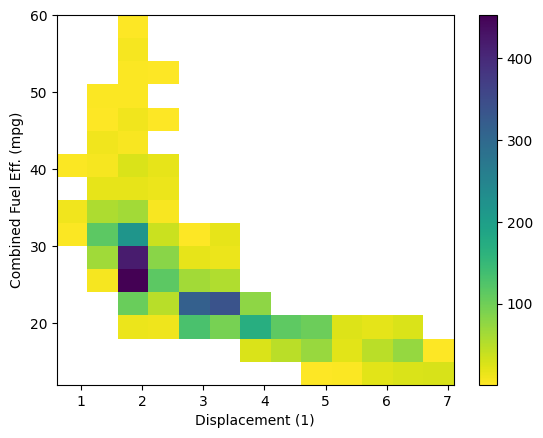

In [42]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.5, 0.5)
bins_y = np.arange(12, 58+3, 3)
 
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

**Annotations on each cell**

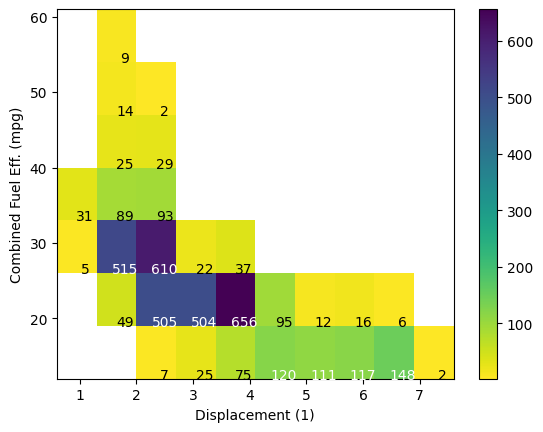

In [39]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

# Violin Plots

**Violin plots** shows the relationship between one quantitative and one qualitative variable.


There are a few ways of plotting the relationship between one quantitative and one qualitative variable, that demonstrate the data at different levels of abstraction. The violin plot is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram.

Seaborn's `violinplot()` function can be used to create violin plots.

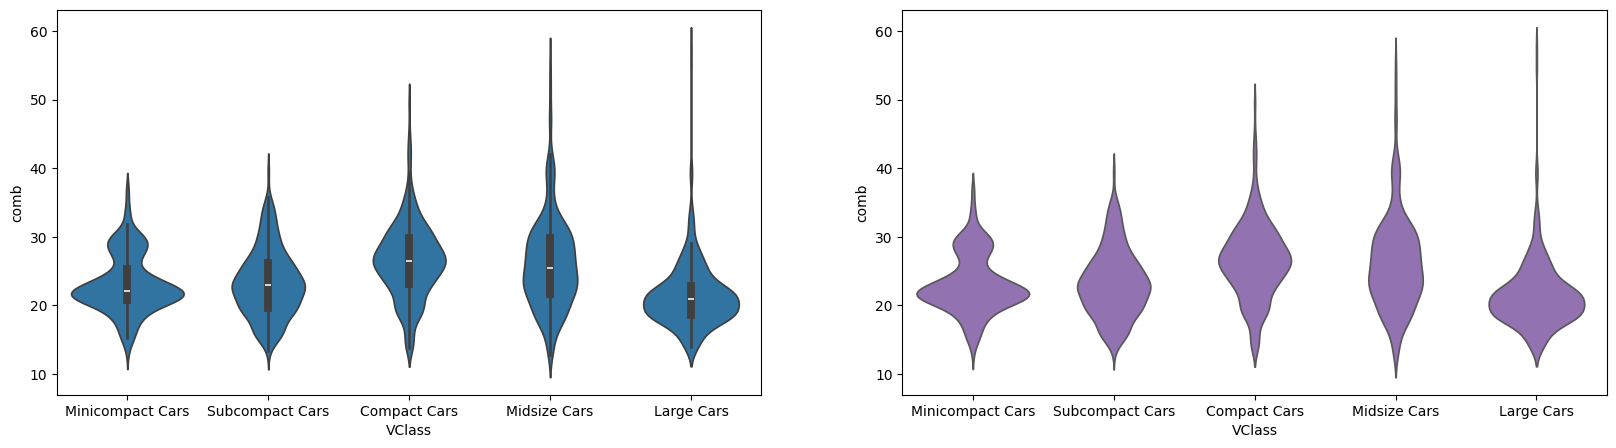

In [54]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
sb.violinplot(data=fuel_econ, x='VClass', y='comb');

plt.subplot(1, 2, 2)
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner=None); #inner=None removes the box plots from the center


# Box Plots

A **box plot** is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on the summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. 

A box plot can be created using seaborn's `boxplot()` function.

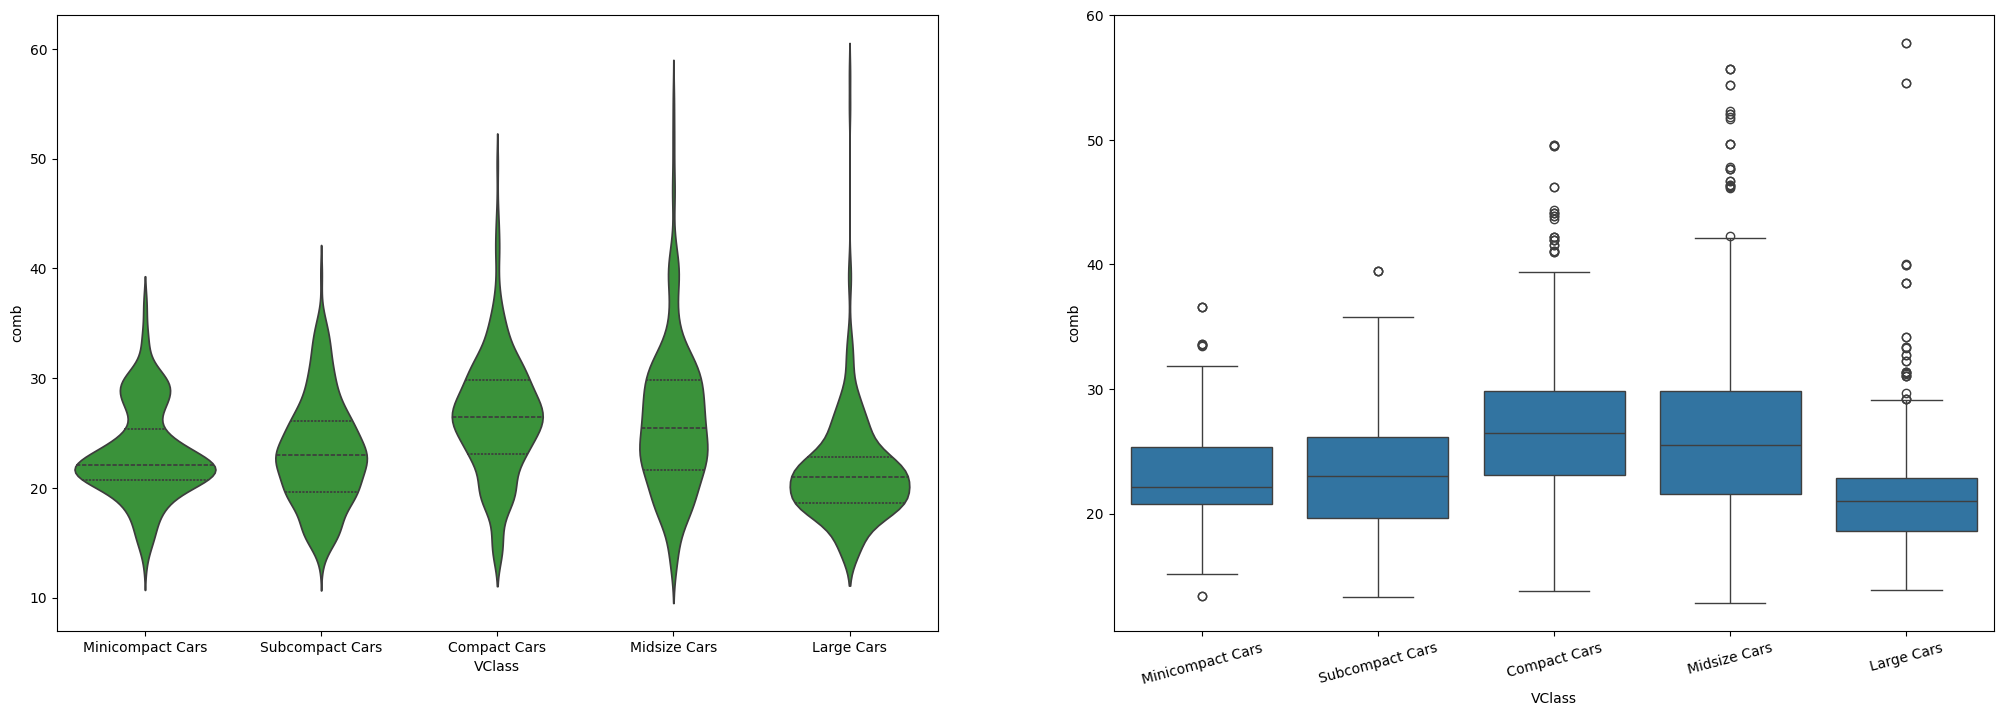

In [71]:
base_color = sb.color_palette()[2]

plt.figure(figsize = [25, 8])
plt.subplot(1, 2, 1)
sb.violinplot(data=fuel_econ, x='VClass', y='comb', inner='quartile', color=base_color); #inner='quartile' shows the lines

plt.subplot(1, 2, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb'); 
plt.xticks(rotation=15);


The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default, this is 1.5 times the IQR. For the Gamma level, there are points below the lower whisker that indicate individual outlier points that are more than 1.5 times the IQR below the first quartile.

Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots. You can clearly see from the box plot that the Delta group has the lowest median. On the other hand, the box plot lacks as nuanced a depiction of distributions as the violin plot: you can't see the slight bimodality present in the Alpha level values. The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.

### Horizontal Violin box plot

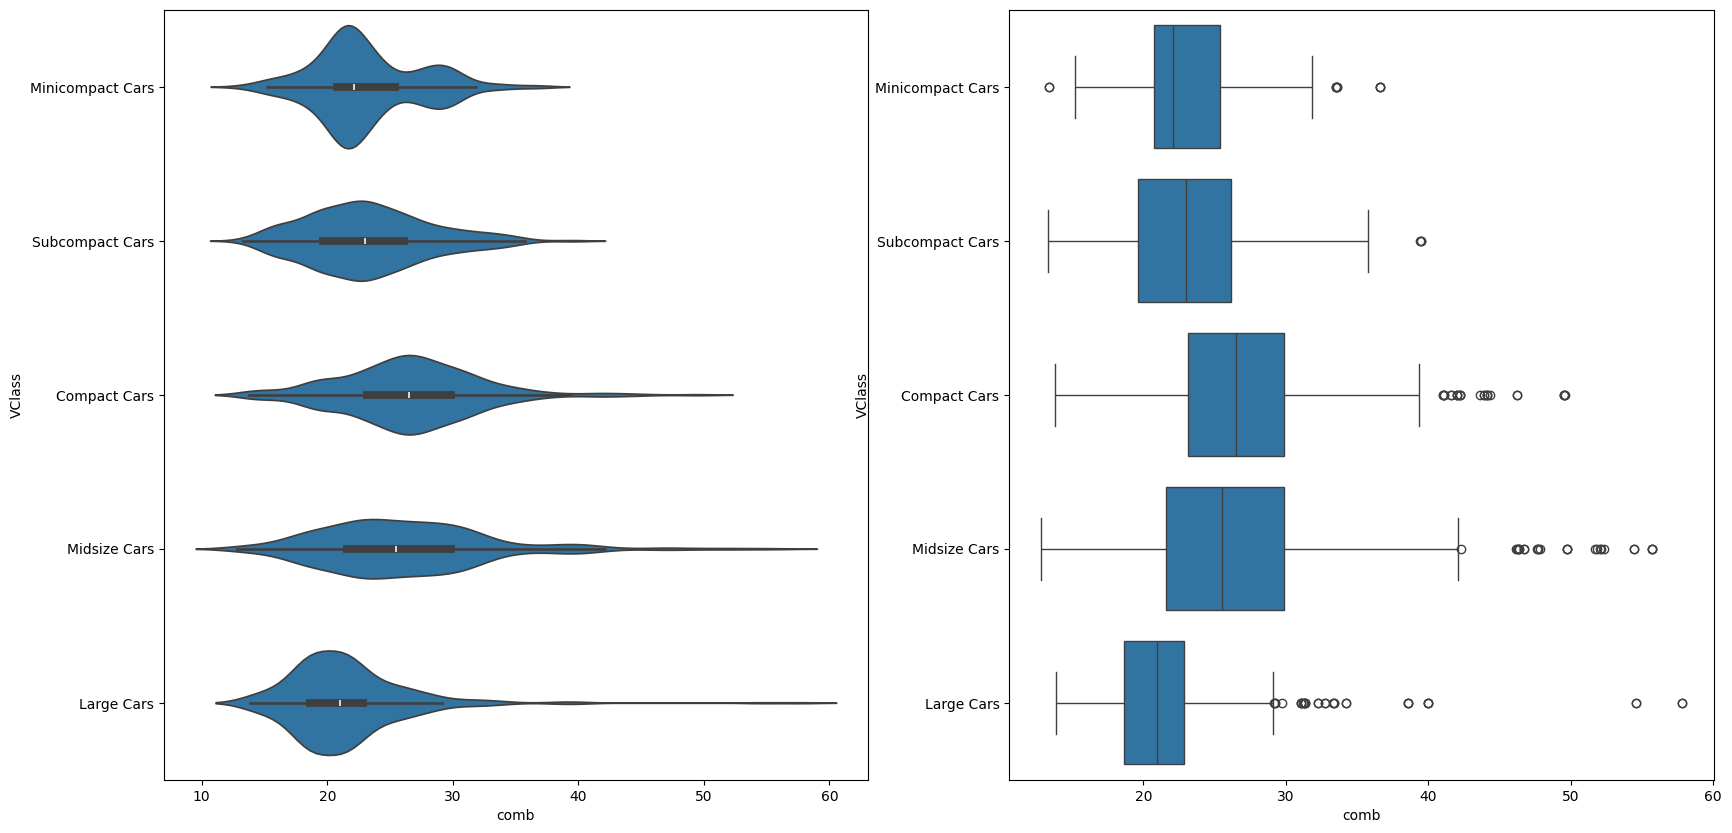

In [70]:
plt.figure(figsize = [20, 10])
plt.subplot(1, 2, 1)
sb.violinplot(data=fuel_econ, x='comb', y='VClass');

plt.subplot(1, 2, 2)
sb.boxplot(data=fuel_econ,  x='comb', y='VClass');

# Clustered Bar Chart

To understand the relationship between two categorical variable we can extend the **univarite barchart** into a **Clustered Bar Chart**.

Easiest way to create bar chart is using seaborn's `countplot` function. 
But for clustered Bar Chart, and additional parameter `hue` would be passed.



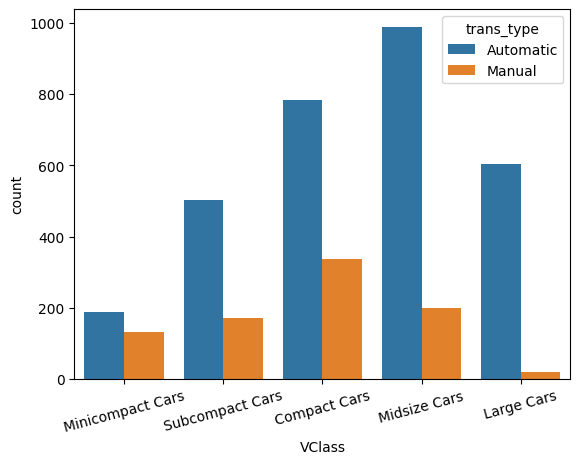

In [102]:
#making additional column of Trans type
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])

sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation=15);


An alternative approch to understand the relationship between two categorical variables is to use HeatMap. 

The above heatmaps were 2-D version of a histogram; here, we're using them as the 2-D version of a bar chart.

The seaborn function `heatmap()` can be used for this type of heat map implementation, but instead of directly passing the dataframe we need to summarize our data so it can used to create this heatmap.


In [82]:
#Summarizing the data
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


<Axes: xlabel='trans_type', ylabel='VClass'>

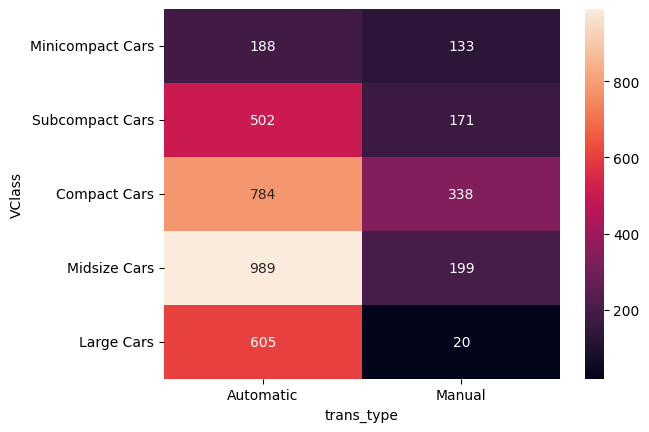

In [83]:
sb.heatmap(ct_counts, annot = True, fmt = 'd') 

#Adding fmt = 'd' means that annotations will all be formatted as integers instead. 
#You can use fmt = '.0f' if you have any cells with no counts, in order to account for NaNs.

**TO DO**

Use a plot to explore whether or not there are differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.)

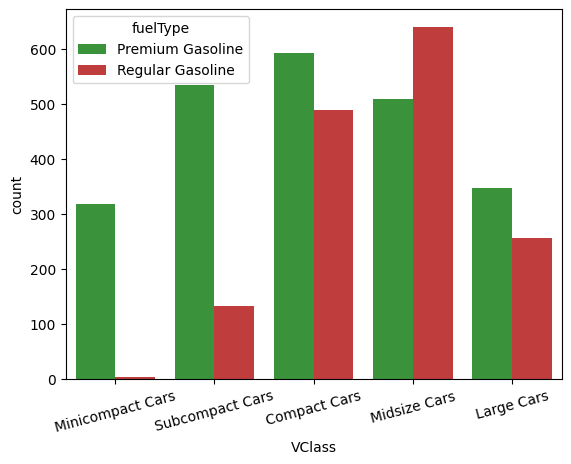

In [113]:
#fuel_econ[['fuelType']].describe()
# fuel_econ['fuelType'].value_counts()

fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

palette = {'Premium Gasoline': "tab:green", 'Regular Gasoline':"tab:red"}
sb.countplot(data = fuel_econ_sub, x = 'VClass', hue = 'fuelType', palette=palette)
plt.xticks(rotation=15);

# Faceting

In **faceting**, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. 

Seaborn's `FacetGrid` class facilitates the creation of faceted plots. 

There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by (vehicle class, "VClass" in our example). Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, the histogram on combined fuel efficiency "comb").

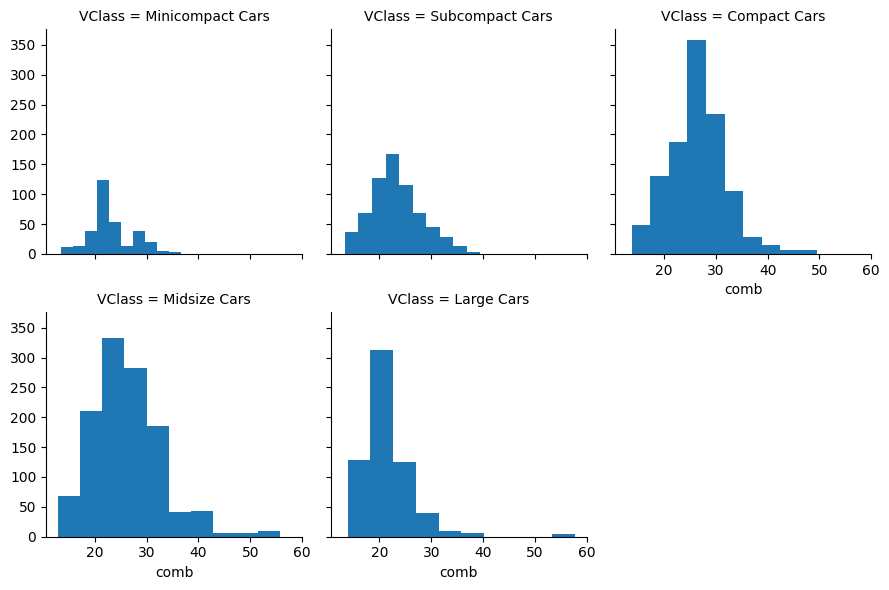

In [122]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3)
g.map(plt.hist, "comb")

# Adapted Bar Charts

As we know that the bar charts shows us the count of single variable, we can change that and make it adapatble for Bivariate by showing Average and Standard Deviation instead of just count.

we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's `barplot` function

Text(0, 0.5, 'Standard Deviation. Combined Fuel Efficiency (mpg)')

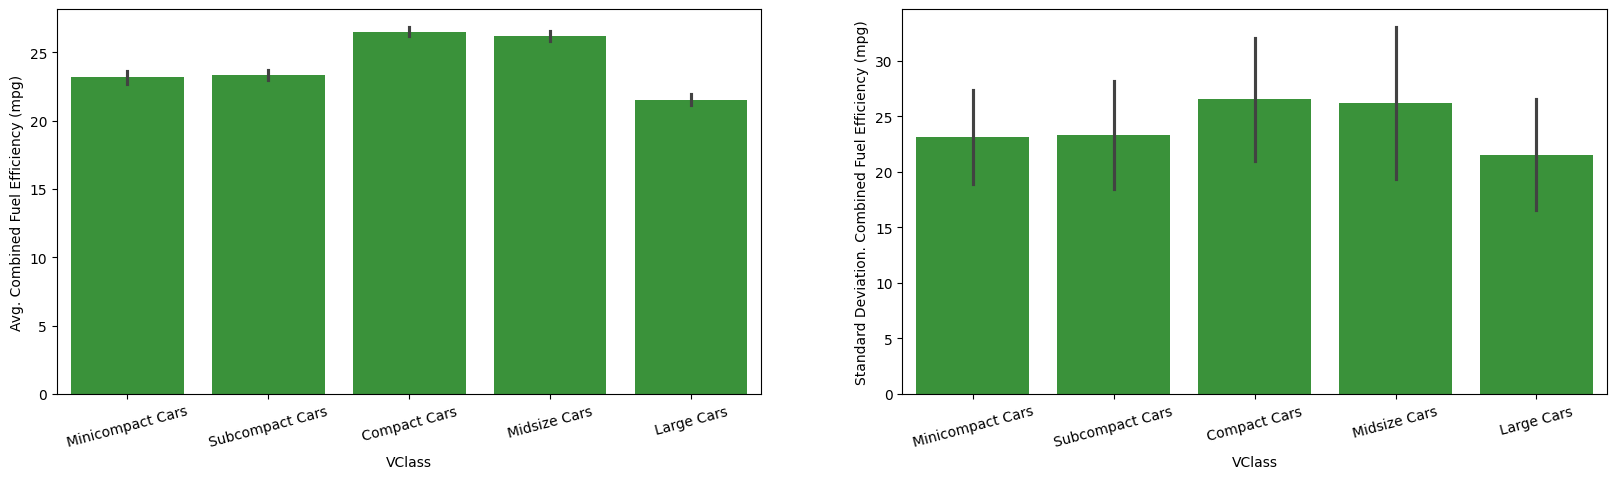

In [128]:
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)

sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

plt.subplot(1, 2, 2)

sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errorbar='sd')
plt.xticks(rotation=15);
plt.ylabel('Standard Deviation. Combined Fuel Efficiency (mpg)')

Text(0, 0.5, 'Standard Deviation. Combined Fuel Efficiency (mpg)')

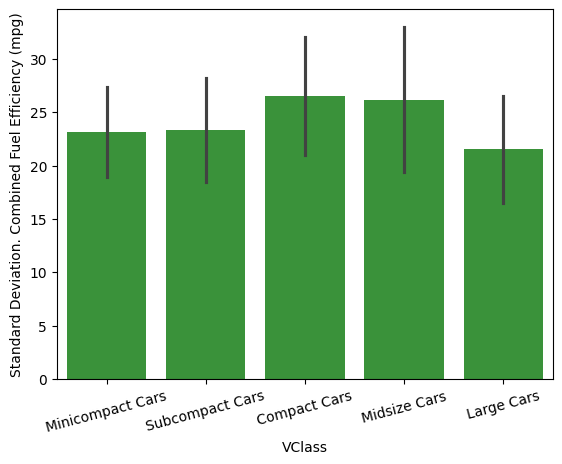